<a href="https://colab.research.google.com/github/rezaul61/Breast-Cancer-Prediction/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/breast_cancer.csv')

In [3]:
data.drop(['Sample code number'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [5]:
x=data.iloc[:,:-1]

In [6]:
y=data.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
linear_model=LogisticRegression(random_state=0).fit(x_train,y_train)

In [11]:
predicted_y=linear_model.predict(x_test)

In [12]:
pd.DataFrame(predicted_y)

,0
0,2
1,2
2,4
3,4
4,2
...,...
132,4
133,2
134,2
135,4


In [13]:
y_test

,Class
113,2
378,2
303,4
504,4
301,2
...,...
21,4
454,2
506,2
500,4


In [14]:
linear_model.score(x_test,y_test)

0.9562043795620438

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_y)

In [16]:
import seaborn as sns

<Axes: >

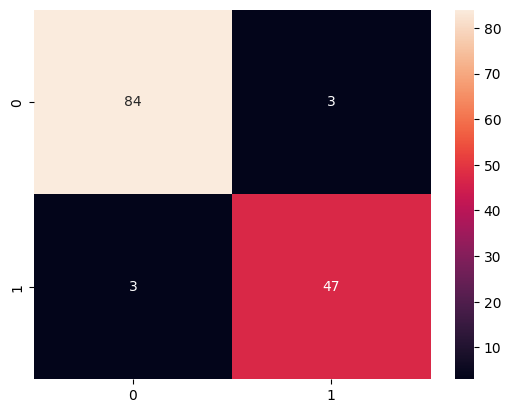

In [17]:
sns.heatmap(cm, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

##By Using Pycaret


In [31]:
from pycaret.classification import *

In [33]:
model=setup(data,target="Class",numeric_imputation="median",log_experiment=False,remove_multicollinearity=True,
            transformation=True,normalize=True,train_size=0.8,)

,Description,Value
0,Session id,8012
1,Target,Class
2,Target type,Binary
3,Target mapping,"2: 0, 4: 1"
4,Original data shape,"(683, 10)"
5,Transformed data shape,"(683, 10)"
6,Transformed train set shape,"(546, 10)"
7,Transformed test set shape,"(137, 10)"
8,Numeric features,9
9,Preprocess,True


In [34]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9798,0.9909,0.9798,0.9811,0.9799,0.9563,0.9574,0.2570
nb,Naive Bayes,0.9761,0.9899,0.9761,0.9778,0.9763,0.9486,0.9500,0.1440
ridge,Ridge Classifier,0.9761,0.9910,0.9761,0.9774,0.9762,0.9481,0.9492,0.1040
lda,Linear Discriminant Analysis,0.9761,0.9910,0.9761,0.9774,0.9762,0.9481,0.9492,0.1000
et,Extra Trees Classifier,0.9761,0.9917,0.9761,0.9774,0.9762,0.9480,0.9491,0.4870
lr,Logistic Regression,0.9743,0.9906,0.9743,0.9753,0.9744,0.9441,0.9450,0.1460
qda,Quadratic Discriminant Analysis,0.9743,0.9921,0.9743,0.9763,0.9745,0.9448,0.9464,0.2070
rf,Random Forest Classifier,0.9724,0.9881,0.9724,0.9734,0.9725,0.9399,0.9407,0.4620
lightgbm,Light Gradient Boosting Machine,0.9705,0.9910,0.9705,0.9710,0.9706,0.9355,0.9359,0.3450
svm,SVM - Linear Kernel,0.9669,0.9900,0.9669,0.9678,0.9669,0.9275,0.9283,0.1100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [28]:
ridge=create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9455,0.9956,0.9455,0.9529,0.9463,0.8837,0.8898
1,0.9636,0.9956,0.9636,0.9636,0.9636,0.9196,0.9196
2,0.9636,0.9942,0.9636,0.9636,0.9636,0.9196,0.9196
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9636,0.9693,0.9636,0.9671,0.9640,0.9215,0.9244
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9815,1.0000,0.9815,0.9824,0.9816,0.9599,0.9607
7,0.9444,0.9925,0.9444,0.9458,0.9448,0.8796,0.8804
8,0.9444,0.9699,0.9444,0.9520,0.9452,0.8824,0.8886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

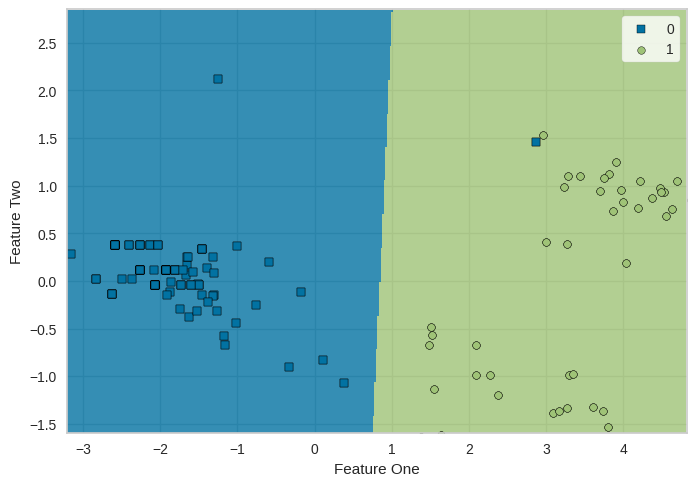

In [29]:
evaluate_model(ridge)

In [35]:
save_model(ridge, 'ridge_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Clump Thickness',
                                              'Uniformity of Cell Size',
                                              'Uniformity of Cell Shape',
                                              'Marginal Adhesion',
                                              'Single Epithelial Cell Size',
                                              'Bare Nuclei', 'Bland Chromatin',...
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True))),
    

In [41]:
from pycaret.classification import load_model

In [49]:
loaded_model=load_model("/content/ridge_classifier",)

Transformation Pipeline and Model Successfully Loaded
